In [2]:
## import some python libraries

import os          # operation system
import sys

import pandas as pd
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'pandas_datareader'

In [7]:
import statsmodels 

In [11]:
statsmodels.formula

AttributeError: module 'statsmodels' has no attribute 'formula'

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# data analysis
import statsmodels.formula.api as sm_formula
import statsmodels.tsa.api as sm_tsa
import statsmodels.api as sm

import scipy.stats as scs

from arch import arch_model

supplement 1 QQ plot


QQ图的全称是Quantile-Quantile plot图，主要用于去判断某一系列的值是否符合正态分布，横坐标是理论值，纵坐标是实际值，当纵坐标和横坐标的坐标值相同的时候，红色的线将位于y=x的线上，如果大部分点都在这条红线上，就说明它们是符合正态分布的。

P-P 图 probability probability plot，其原理在于如果数据正态，那么数据的累积比例与正态分布累积比例基本保持一致。分别计算出数据累积比例，和假定正态时的数据分布累积比例；并且将实际数据累积比例作为X轴，将对应正态分布累积比例作为Y轴，作散点图。

In [21]:
########################################################################
########################################################################
##             define the fucntion for ploting time series and analysis results
##
########################################################################
########################################################################



#  画图确实是一项dirty work
## bms style: gird on with grey background
def Time_Series_Plot(ts, lags = None, figsize = (10,8), style = 'bmh'):
        if not isinstance(ts, pd.Series):
            ts = pd.Series(ts);
            
        with plt.style.context(style):
            
            fig = plt.figure(figsize = figsize);
            
            ## layout of the figure
            layout = (3,2);
            ## colspan : Number of columns for the axis to span to the right.
            ts_axes = plt.subplot2grid(layout, (0,0), colspan= 2);
            
            acf_axes =  plt.subplot2grid(layout, (1,0));
            pacf_axes =  plt.subplot2grid(layout, (1,1));
            
            qq_axes =  plt.subplot2grid(layout, (2,0));
            pp_axes =  plt.subplot2grid(layout, (2,1));
            
            ## plot the axes on the figure
            ts.plot(ax = ts_axes);
            ts_axes.set_title('Time Series Plot');
            
            sm_tsa.graphics.plot_acf(ts, lags = lags, ax = acf_axes, alpha = 0.5);
            sm_tsa.graphics.plot_pacf(ts, lags = lags, ax = pacf_axes, alpha = 0.5);
            
            sm.qqplot(ts, line = 's', ax = qq_axes);
            qq_axes.set_title('QQ plot');
            # pp  plot
            scs.probplot(ts, sparams=(ts.mean(), ts.std()), plot=pp_axes);
            
            plt.tight_layout();
            
        return;
            

G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


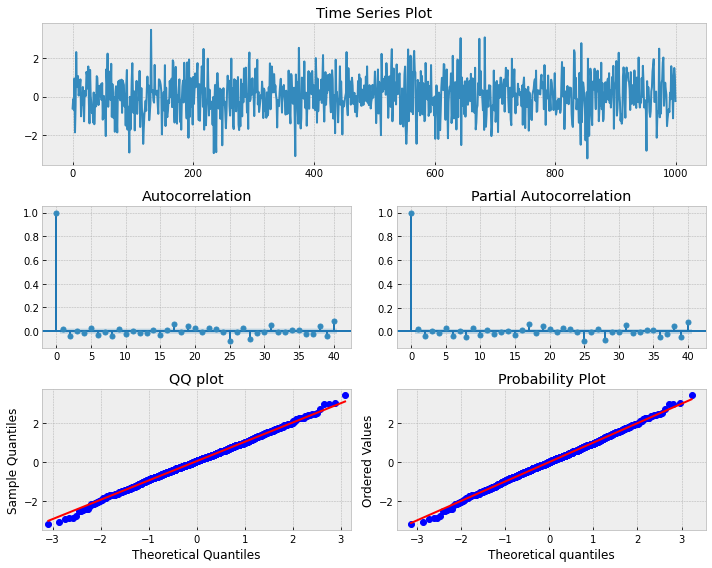

In [24]:
##################################################################
##################################################################
#   model a white noise
#
##################################################################
##################################################################

np.random.seed(40);

rand_seires = np.random.normal(size = 1000);
Time_Series_Plot(rand_seires, lags= 40);

In [25]:
print("""Random Series \n
-----------\n
mean: {:.3f} \n
variance: {:.3f} \n
standard deviation: {:.3f}\n
""".format(rand_seires.mean(), rand_seires.var(), rand_seires.std()));

Random Series 

-----------

mean: 0.046 

variance: 0.988 

standard deviation: 0.994




G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


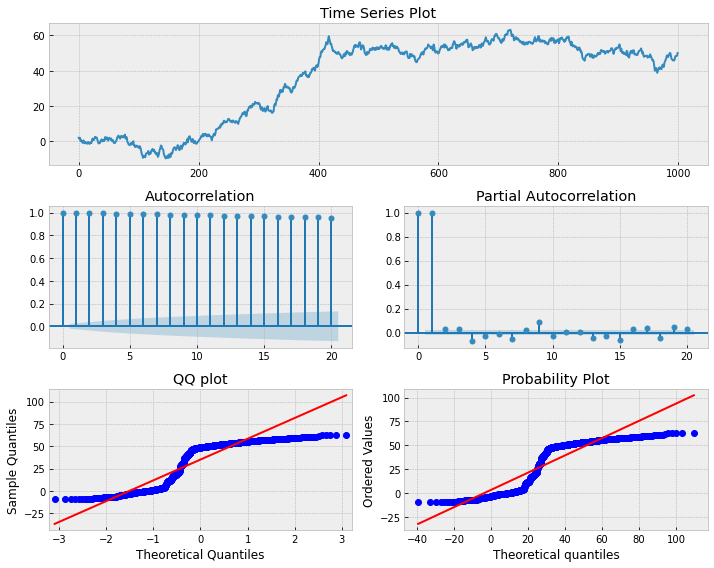

In [27]:
##################################################################
##################################################################
#   model a random walk
#
##################################################################
##################################################################

sample_size = 1000;

x = u = np.random.normal(size = sample_size);

for i in range(sample_size):
    x[i] = x[i-1] + u[i];
    
Time_Series_Plot(x, lags= 20);

G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


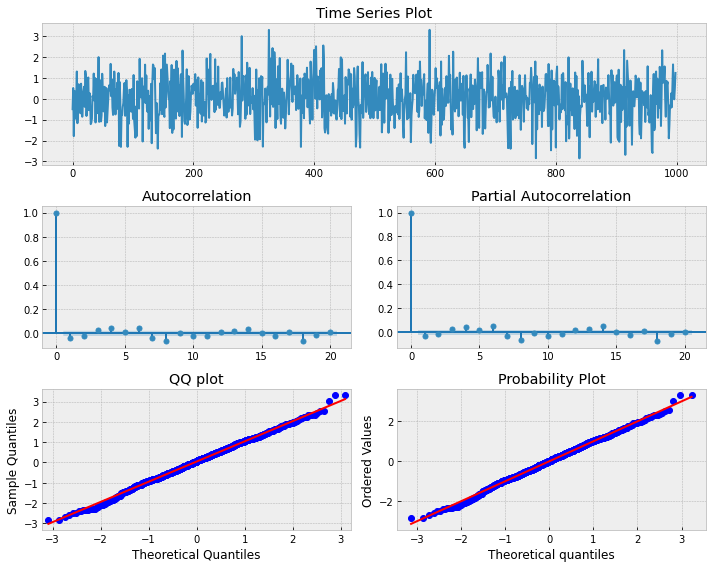

In [28]:
##################################################################
##################################################################
#   对随机游走模型进行一阶差分
#
##################################################################
##################################################################
x_diff_1 = np.diff(x);
Time_Series_Plot(x_diff_1, lags= 20);

In [29]:
# 读取甲醇期货价格序列
path = r"C:/Users/My/Desktop/Data/Zhengzhou/Carbinol.xlsx";

data = pd.read_excel(path);

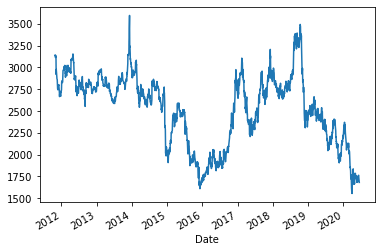

In [41]:
data.index = data['Date']
# data
closed_value_series = pd.Series(data['close']);
# closed_value_series
closed_value_series.plot();


G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


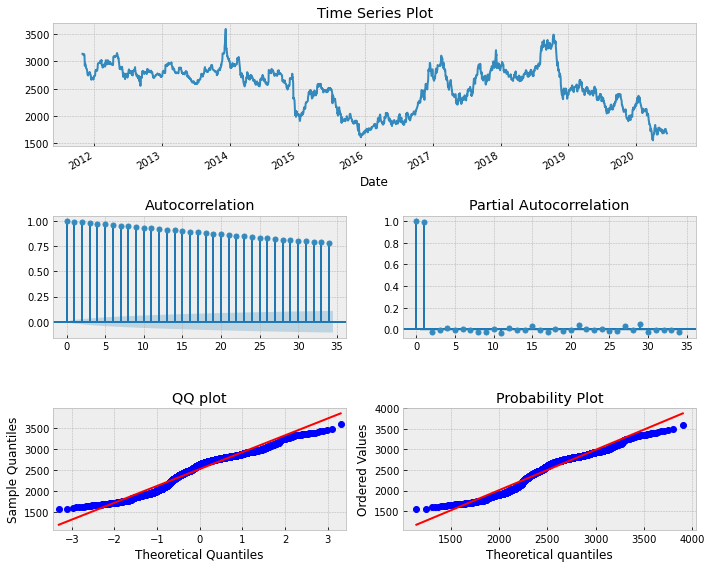

In [46]:
##################################################################
##################################################################
#   分析一下期货价格
#
##################################################################
##################################################################
Time_Series_Plot(closed_value_series);

G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


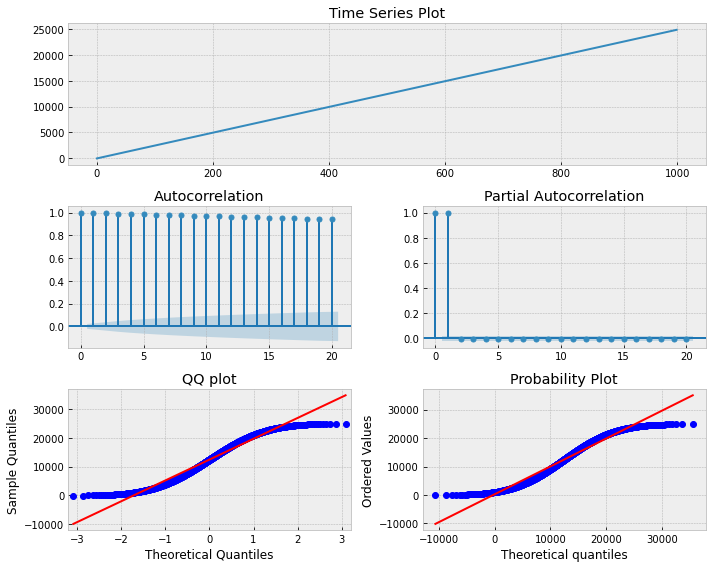

In [59]:
##################################################################
##################################################################
#   线性模型
#
##################################################################
##################################################################

## disturbance term
sample_size = 1000;
u = np.random.normal(size = sample_size);
y = np.empty_like(u);

b_0 = -50.0;
b_1 = 25.0;
for i in range(sample_size):
    y[i] = b_0 + b_1* i  + u[i];
    
Time_Series_Plot(y,lags = 20);

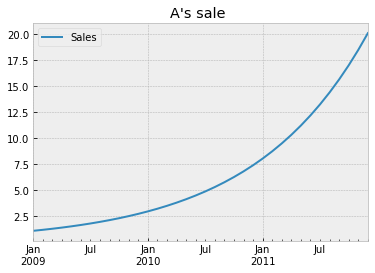

In [62]:
##################################################################
##################################################################
#   对数线性模型
#   假定某公司A 每个时间单位后销售额增长百分之x(x%)
#
# 
##################################################################
##################################################################

# simulate A公司的 growth

date_index = pd.date_range('2009-01-01', '2012-01-01', freq = 'M');

sales = [];
for i in range(1, len(index)+1):
    sales.append(np.exp(i/12));
    
sales

data_frame = pd.DataFrame(sales, columns=['Sales'], index = date_index);

with plt.style.context('bmh'):
    data_frame.plot();
    plt.title('A\'s sale ');

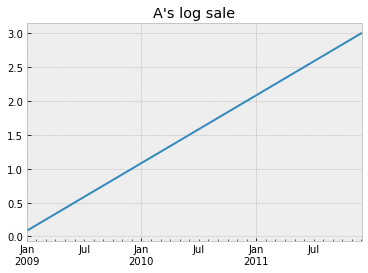

In [63]:
with plt.style.context('bmh'):
    
    ts1 = pd.Series(np.log(sales), index = date_index);
    ts1.plot();
    plt.title('A\'s log sale');

G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


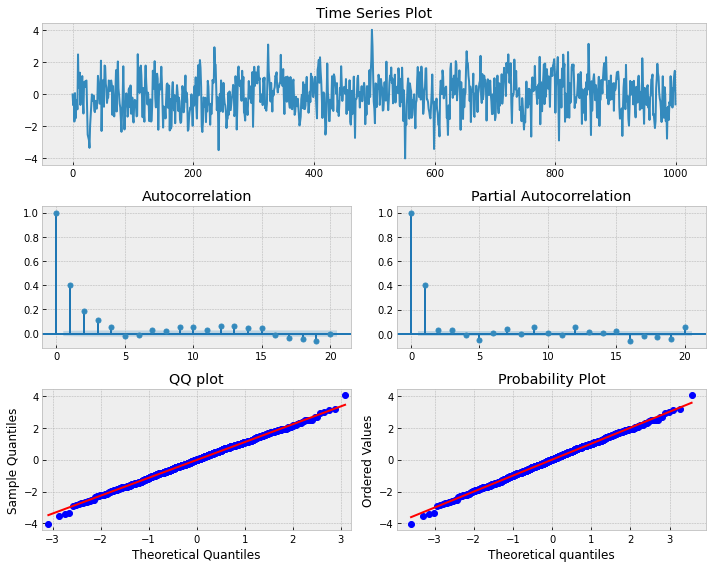

In [70]:
##################################################################
##################################################################
# 自回归模型 AR（p）
#         一般地假设为0均值
##################################################################
##################################################################

np.random.seed(12);
sample_size = 1000;
# 一阶自回归模型的参数，<1
a_1 = 0.4;

x_t = u_t = np.random.normal(size = sample_size);

for t in range(sample_size):
    x_t[t] = a_1 * x_t[t-1] + u_t[t];
    
Time_Series_Plot(x_t, lags = 20)


In [82]:
 ##################################################################
##################################################################
#         模型拟合
#         利用statsmodels库
##################################################################
##################################################################

model = sm.tsa.AR(x_t).fit(maxlag = 30, ic='aic', trend='nc');
# 计算该条语句执行时间
%time est_order = sm_tsa.AR(x_t).select_order(maxlag = 30, ic = 'aic', trend = 'nc');

true_order = 1;
print("""
parameter estimated: {:3.5f}  |  best lag order = {}
""".format(model.params[0], est_order));

print("""
true parameter: {:3.5f}  |  true lag order = {}
""".format(a_1, true_order));

Wall time: 20.8 s

parameter estimated: 0.39919  |  best lag order = 1


true parameter: 0.40000  |  true lag order = 1



G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


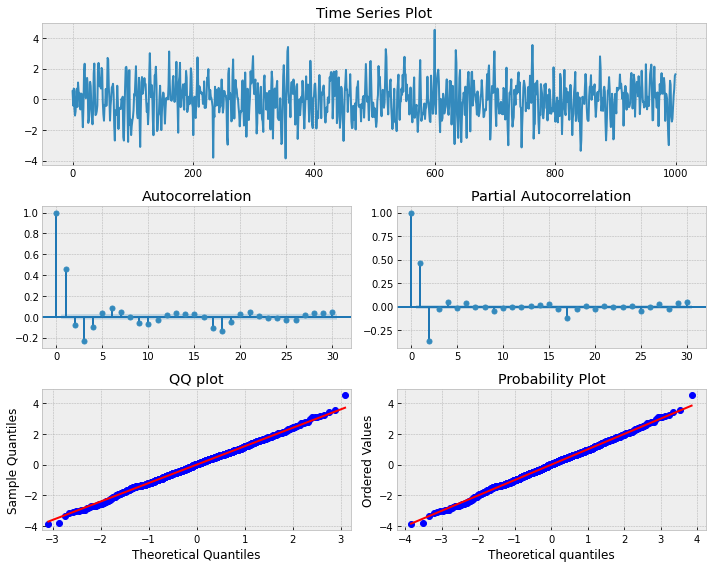

In [99]:
##################################################################
##################################################################
#         模拟AR（2）阶模型
##################################################################
##################################################################

sample_size = 1000;
# AR params
# 第一个1 代表zero-lag value， 即将方程方程右侧为0的标准表达式
alphas = np.array([0.66, -0.4]);
# MA params
betas = np.array([0.]);

ar_params = np.r_[1, -alphas];
ma_params = np.r_[1, betas];

ar2_process = sm_tsa.arma_generate_sample(ar = ar_params,ma = ma_params,nsample=sample_size);

Time_Series_Plot(ar2_process)



In [107]:
# import warnings
# warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

# # warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
##################################################################
##################################################################
#         模型拟合
#         利用statsmodels库
##################################################################
##################################################################


model2 = sm.tsa.AR(ar2_process).fit(maxlag = 30, ic='aic', trend='nc');
# 计算该条语句执行时间
%time est_order = sm_tsa.AR(ar2_process).select_order(maxlag = 30, ic = 'aic', trend = 'nc');

true_order = 2;
print("""
parameter estimated: {} |  best lag order = {}
""".format(model2.params, est_order));

print("""
true parameter: {:3.5f}  {:3.5f}  |  true lag order = {}
""".format(alphas[0],alphas[1], true_order));

Wall time: 20.5 s


KeyError: 'f'

In [108]:
true_order = 2;
print("""
parameter estimated: {} |  best lag order = {}
""".format(model2.params, est_order));

print("""
true parameter: {:3.5f}  {:3.5f}  |  true lag order = {}
""".format(alphas[0],alphas[1], true_order));


parameter estimated: [ 0.62916141 -0.36588371] |  best lag order = 2


true parameter: 0.66000  -0.40000  |  true lag order = 2



In [109]:
##################################################################
##################################################################
#         用AR模型拟合甲醇期货价格序列
#         利用statsmodels库
##################################################################
##################################################################

future_price_model_ar = sm.tsa.AR(closed_value_series).fit(maxlag = 30, ic='aic', trend='nc');
# 计算该条语句执行时间
%time est_order = sm_tsa.AR(closed_value_series).select_order(maxlag = 30, ic = 'aic', trend = 'nc');

print("""
parameter estimated: {} |  best lag order = {}
""".format(future_price_model_ar.params, est_order));


G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
G:\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Wall time: 34.4 s

parameter estimated: [ 0.62916141 -0.36588371] |  best lag order = 9



In [110]:
print("""
parameter estimated: {} |  best lag order = {}
""".format(future_price_model_ar.params, est_order));


parameter estimated: L1.close    1.035806
L2.close   -0.036168
dtype: float64 |  best lag order = 9



In [113]:
print(future_price_model_ar.params[])

IndexError: index 3 is out of bounds for axis 0 with size 2

In [116]:
import os

os.path('\')

SyntaxError: EOL while scanning string literal (<ipython-input-116-7929ae817317>, line 3)